In [6]:
import rasterio
import numpy as np
from rasterio.errors import NotGeoreferencedWarning
import warnings
import matplotlib.pyplot as plt

In [2]:
#Utility functions for reading images and masks and print files metadata

def process_mask(mask_path):
    """Processes a classification mask (suppresses georef warnings locally)."""
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", NotGeoreferencedWarning)  # LOCAL suppression
        with rasterio.open(mask_path) as src:
            mask = src.read(1)
            print(f"Mask dims: {mask.shape} | Unique classes: {np.unique(mask)}")
            return mask

        
def process_georeferenced_image(img_path):
    """Processes georeferenced images (keeps warnings enabled)."""
    with rasterio.open(img_path) as src:
        if src.transform.is_identity:
            print("⚠️ Warning: Image lacks georeferencing!")  # Custom warnin
        print(f"CRS: {src.crs} | Transform: {src.transform}")
        # Get metadata
        metadata = src.meta  # Includes CRS, transform, etc.
        band_count = src.count  # Number of bands
        width = src.width       # Width in pixels
        height = src.height     # Height in pixels
        crs = src.crs           # Coordinate Reference System
        # Print basic info
        print(f"Number of bands: {band_count}")
        print(f"Image dimensions: {width} x {height}")
        print(f"CRS: {crs}")
        print(f"Metadata: {metadata}")
        img = src.read()
        return img


In [3]:
image_path = "path_to_your_geotiff_image"
mask_path = "path_to_your_mask"

In [4]:
print('### Reading image ###')
image  = process_georeferenced_image(image_path)
print('### Reading mask ###')
mask = process_mask(mask_path)


### Reading image ###
⚠️ Warning: Image lacks georeferencing!
CRS: EPSG:4326 | Transform: | 1.00, 0.00, 0.00|
| 0.00, 1.00, 0.00|
| 0.00, 0.00, 1.00|
Number of bands: 1
Image dimensions: 240 x 240
CRS: EPSG:4326
Metadata: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 240, 'height': 240, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)}
### Reading mask ###
Mask dims: (240, 240) | Unique classes: [ 0 11]


C:\Users\elena\miniconda3\envs\py39\lib\site-packages\rasterio\__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


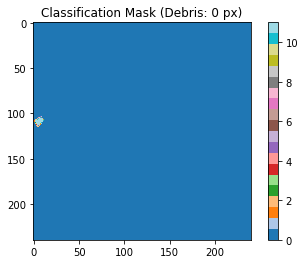

In [7]:
count = mask[mask ==  1].sum()
plt.imshow(mask, cmap='tab20')  # Use categorical colormap
plt.title(f"Classification Mask (Debris: {count} px)")
plt.colorbar()
plt.show()

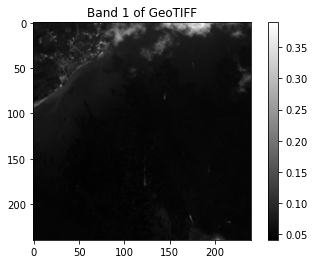

In [8]:
#Visualize the first band (e.g., for RGB, this could be Red)
plt.imshow(image[0], cmap='gray')  # Change index for other bands
plt.title("Band 1 of GeoTIFF")
plt.colorbar()
plt.show()